<a href="https://colab.research.google.com/github/Jose-Bruno/PDS/blob/main/Detec%C3%A7%C3%A3o_de_objetos_(APNP_de_09_10_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
#carrega a imagem original.
imagem = "/content/drive/MyDrive/Especialização/Manufatura Avançada (Industria 4.0)/Processamento Digital de Sinais /Objetos.jpg"

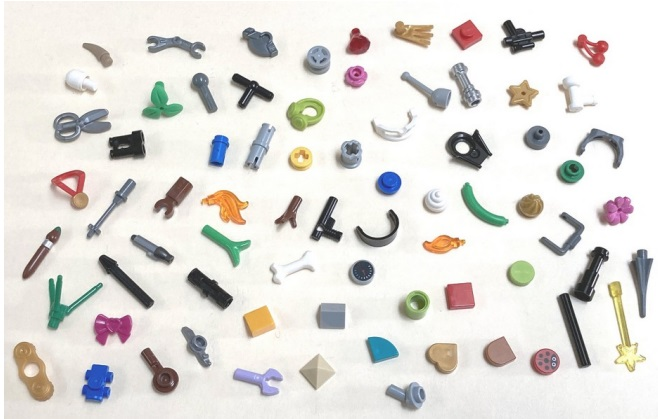

In [ ]:
#Ler a imagem original.
image = cv2.imread(imagem)

# Exibi a imagem original.
cv2_imshow(image)

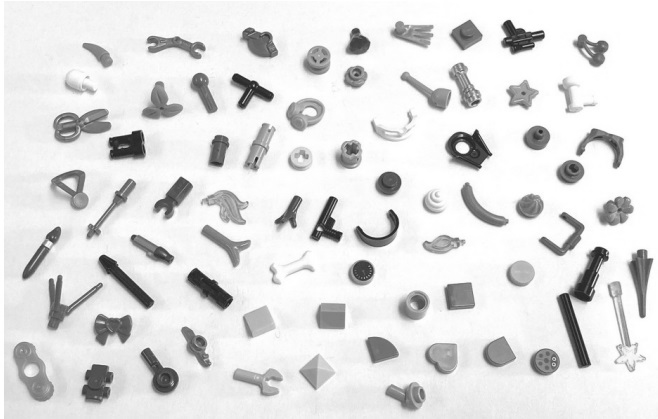

In [ ]:
#Converte a imagem para escala de cinza.

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)


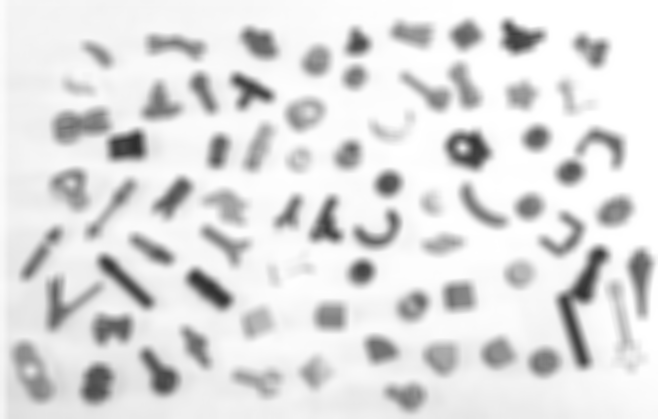

In [ ]:
#Aplicar o efeito de suavização (blur) na imagem para retirar o ruído e facilitar a identificação das bordas.

kernel = (11,11)
img_suave = cv2.blur(img_gray, kernel);
cv2_imshow(img_suave)

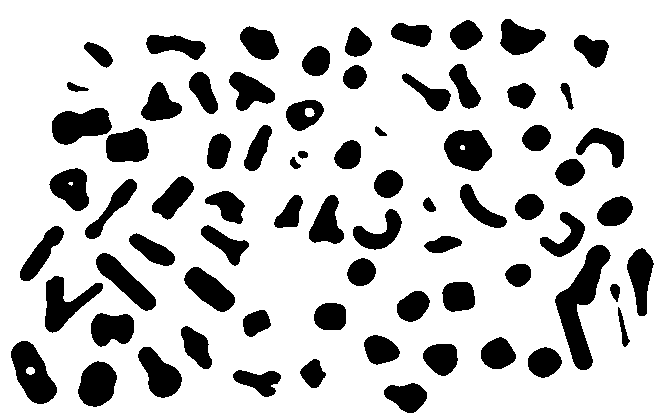

In [ ]:
#Aplica uma binarização na imagem resultando em pixels só brancos e pretos.

limiar, img_bin = cv2.threshold(img_suave, 200, 255, cv2.THRESH_BINARY)
cv2_imshow(img_bin)

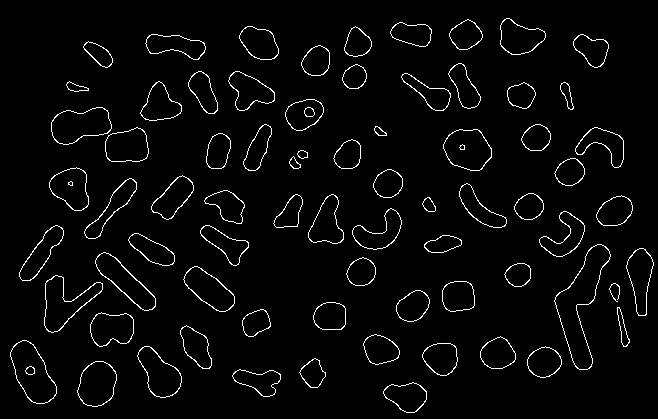

In [ ]:
#Aplica um detector de bordas para identificar os objetos na imagem.

limiarFraco = 70
limiarForte = 150
img_bordas = cv2.Canny(img_bin, limiarFraco, limiarForte)
cv2_imshow(img_bordas)

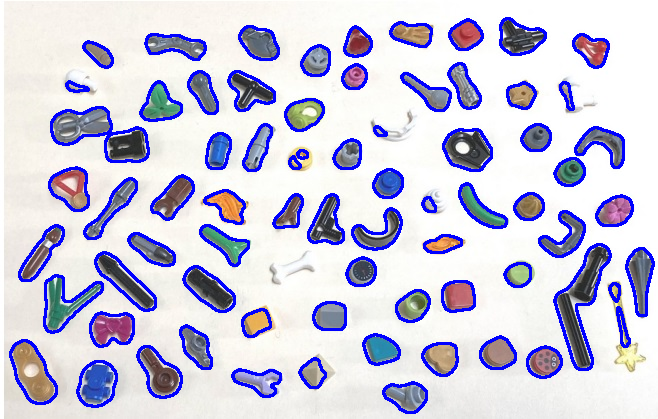

In [ ]:
# Aplicar a detecção de objetos
objetos = cv2.findContours(img_bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
objetos = objetos[0] if len(objetos) == 2 else objetos[1]

# Copia a imagem original para desenhar os contornos
imgColorida = image.copy()
cv2.drawContours(imgColorida, objetos, -1, (255, 0, 0), 2)
cv2_imshow(imgColorida)

In [ ]:
# Exibe a quantidade de objetos detectados

print("Quantidade de objetos: " + str(len(objetos)))

Quantidade de objetos: 73


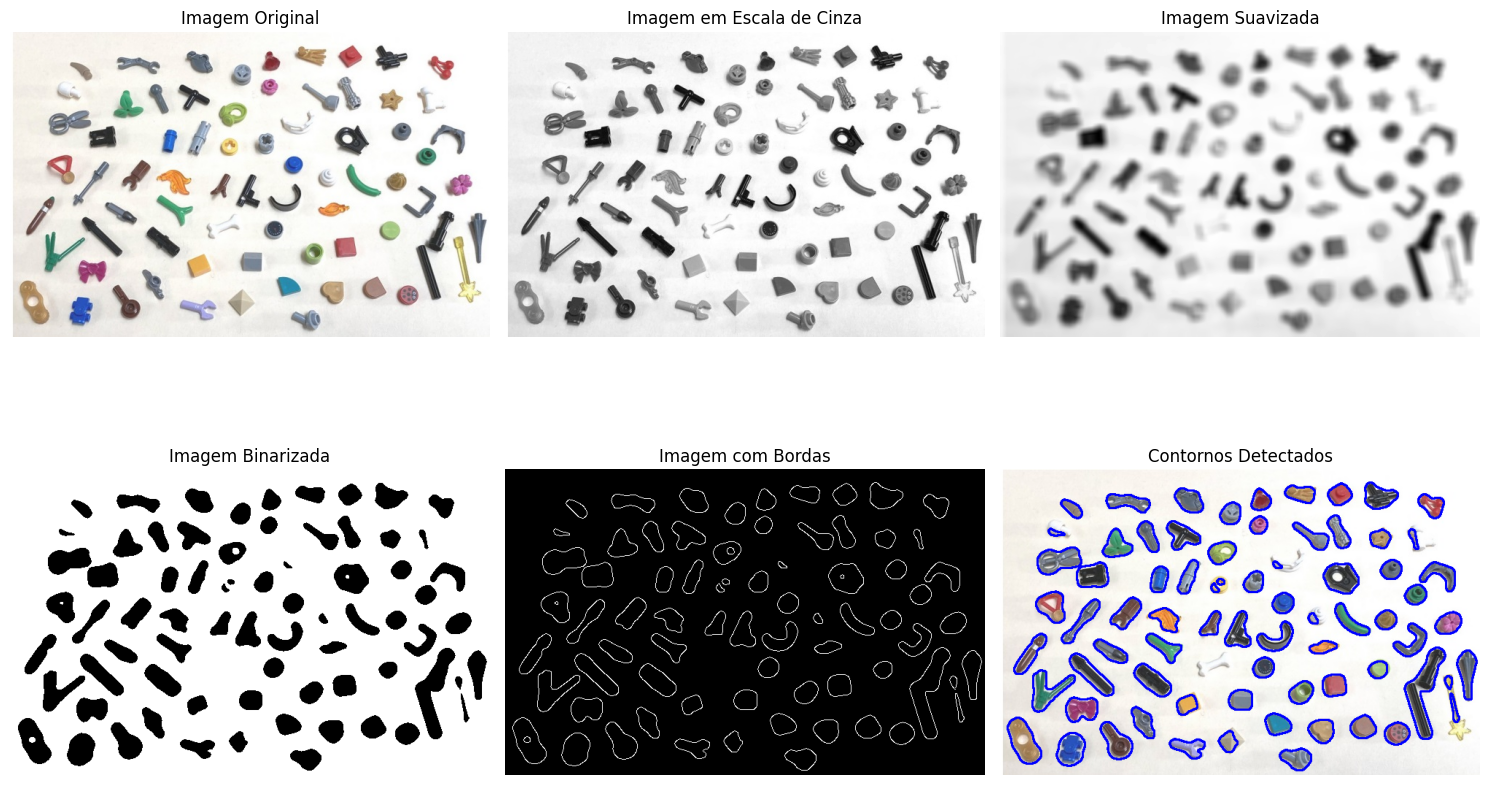

In [ ]:
# Lista de imagens e títulos
imagens = [image, img_gray, img_suave, img_bin, img_bordas, imgColorida]
titulos = ['Imagem Original', 'Imagem em Escala de Cinza', 'Imagem Suavizada',
           'Imagem Binarizada', 'Imagem com Bordas', 'Contornos Detectados']

# Exibir as imagens lado a lado
plt.figure(figsize=(15, 10))  # Define o tamanho da figura

for i in range(6):
    plt.subplot(2, 3, i+1)  # Organiza em 2 linhas e 3 colunas
    if len(imagens[i].shape) == 2:  # Se for imagem em tons de cinza
        plt.imshow(imagens[i], cmap='gray')
    else:  # Se for imagem colorida
        plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB))
    plt.title(titulos[i])
    plt.axis('off')  # Remove os eixos

plt.tight_layout()
plt.show()